In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

from functions import gpt

In [2]:
model = 'gpt-4'

In [3]:
system_prompt = """You are an expert mathematician.
- I want to generate 3 datasets
    - one for the first function.
    - one for the second function. For each x,y pair, as x increases y should decrease.
    - one that closely mirrors the second function, but with y values that are randomly greater than or less than the y values 
      of the second function.
- I want the x, y coordinates of the 2 functions to fit the same plot as closely as possible
- I want x to be between 0 and 10
- I need the full dataset with 10 points per function
- Create a unique name for the first 2 functions that is based on the type of math that is used. Use that name as the key for the data.
    - for the 3rd dataset use the name 'Sample'.
- Please format your response in JSON. You only speak JSON. Do not write text that isn't JSON.
"""

In [4]:
text = """
a) y=14*0.45^x
b) y=0.5x^2-5x+13
"""

In [5]:
step_1_response = gpt.chat_create(system_prompt, text, model, output_json=True)

In [6]:
step_1_response

{'ExponentialDecay': [{'x': 0, 'y': 14},
  {'x': 1, 'y': 6.3},
  {'x': 2, 'y': 2.835},
  {'x': 3, 'y': 1.27575},
  {'x': 4, 'y': 0.5735875},
  {'x': 5, 'y': 0.258114375},
  {'x': 6, 'y': 0.11615146875},
  {'x': 7, 'y': 0.0522681610625},
  {'x': 8, 'y': 0.023520672378125},
  {'x': 9, 'y': 0.01058430257015625},
  {'x': 10, 'y': 0.004762936056570313}],
 'QuadraticFunction': [{'x': 0, 'y': 13},
  {'x': 1, 'y': 8},
  {'x': 2, 'y': 5},
  {'x': 3, 'y': 4},
  {'x': 4, 'y': 5},
  {'x': 5, 'y': 8},
  {'x': 6, 'y': 13},
  {'x': 7, 'y': 20},
  {'x': 8, 'y': 29},
  {'x': 9, 'y': 40},
  {'x': 10, 'y': 53}],
 'Sample': [{'x': 0, 'y': 12.5},
  {'x': 1, 'y': 7.8},
  {'x': 2, 'y': 4.7},
  {'x': 3, 'y': 3.9},
  {'x': 4, 'y': 4.8},
  {'x': 5, 'y': 7.6},
  {'x': 6, 'y': 12.4},
  {'x': 7, 'y': 19.6},
  {'x': 8, 'y': 28.7},
  {'x': 9, 'y': 39.8},
  {'x': 10, 'y': 52.7}]}

In [7]:
system_prompt = """You are an expert mathematician and data scientist.
- Please generate python code using matplotlib to visualize the provided dataset
- Please format your response in the python coding language. You only speak python. Do not write text that isn't python.
- Do not include any comments in your code.
- Do not include the dataset in your response. Only include the code needed to create the plot. 
- The dataset variable name will be step_1_response.
"""

In [8]:
step_2_response = gpt.chat_create(system_prompt, json.dumps(step_1_response), model, output_json=False)

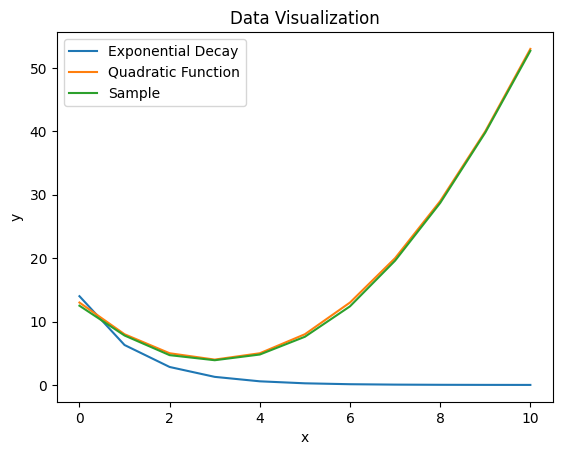

In [9]:
exec(step_2_response)

In [10]:
system_prompt = f"""You are an expert mathematician and data scientist.
I have 2 functions:
{text}
- Given the provided dataset, which function more closely matches the dataset?
- Please format your response as just the single character a or b
- Do not include any comments in your response.
- Do not include the dataset in your response. Only include the answer a or b. 
"""

In [11]:
step_3_response = gpt.chat_create(system_prompt, json.dumps(step_1_response['Sample']), model, output_json=False)

In [12]:
step_3_response

'b'

In [16]:
system_prompt = f"""You are an expert mathematician and data scientist.
- Given the provided dataset, generate a new one that closely mirrors it, 
    but with y values that are randomly greater than or less than the y values.
- I want x to be between 0 and 10
- I need the full dataset with 10 points per function
- Use the name 'Sample' for the returned dataset.
- Please format your response in JSON. You only speak JSON. Do not write text that isn't JSON.
- Do not include any comments in your response.
"""

In [17]:
step_4_response = gpt.chat_create(system_prompt, json.dumps(step_1_response['ExponentialDecay']), model, output_json=True)

In [18]:
step_4_response

{'Sample': [{'x': 0, 'y': 15.2},
  {'x': 1, 'y': 7.1},
  {'x': 2, 'y': 3.1},
  {'x': 3, 'y': 1.5},
  {'x': 4, 'y': 0.6},
  {'x': 5, 'y': 0.3},
  {'x': 6, 'y': 0.13},
  {'x': 7, 'y': 0.06},
  {'x': 8, 'y': 0.03},
  {'x': 9, 'y': 0.01},
  {'x': 10, 'y': 0.005}]}

In [19]:
dataset_2 = {}
dataset_2['ExponentialDecay'] = step_1_response['ExponentialDecay']
dataset_2['QuadraticFunction'] = step_1_response['QuadraticFunction']
dataset_2['Sample'] = step_4_response['Sample']

dataset_2

{'ExponentialDecay': [{'x': 0, 'y': 14},
  {'x': 1, 'y': 6.3},
  {'x': 2, 'y': 2.835},
  {'x': 3, 'y': 1.27575},
  {'x': 4, 'y': 0.5735875},
  {'x': 5, 'y': 0.258114375},
  {'x': 6, 'y': 0.11615146875},
  {'x': 7, 'y': 0.0522681610625},
  {'x': 8, 'y': 0.023520672378125},
  {'x': 9, 'y': 0.01058430257015625},
  {'x': 10, 'y': 0.004762936056570313}],
 'QuadraticFunction': [{'x': 0, 'y': 13},
  {'x': 1, 'y': 8},
  {'x': 2, 'y': 5},
  {'x': 3, 'y': 4},
  {'x': 4, 'y': 5},
  {'x': 5, 'y': 8},
  {'x': 6, 'y': 13},
  {'x': 7, 'y': 20},
  {'x': 8, 'y': 29},
  {'x': 9, 'y': 40},
  {'x': 10, 'y': 53}],
 'Sample': [{'x': 0, 'y': 15.2},
  {'x': 1, 'y': 7.1},
  {'x': 2, 'y': 3.1},
  {'x': 3, 'y': 1.5},
  {'x': 4, 'y': 0.6},
  {'x': 5, 'y': 0.3},
  {'x': 6, 'y': 0.13},
  {'x': 7, 'y': 0.06},
  {'x': 8, 'y': 0.03},
  {'x': 9, 'y': 0.01},
  {'x': 10, 'y': 0.005}]}

In [21]:
system_prompt = """You are an expert mathematician and data scientist.
- Please generate python code using matplotlib to visualize the provided dataset
- Please format your response in the python coding language. You only speak python. Do not write text that isn't python.
- Do not include any comments in your code.
- Do not include the dataset in your response. Only include the code needed to create the plot. 
- The dataset variable name will be dataset_2.
"""

In [22]:
step_5_response = gpt.chat_create(system_prompt, json.dumps(dataset_2), model, output_json=False)

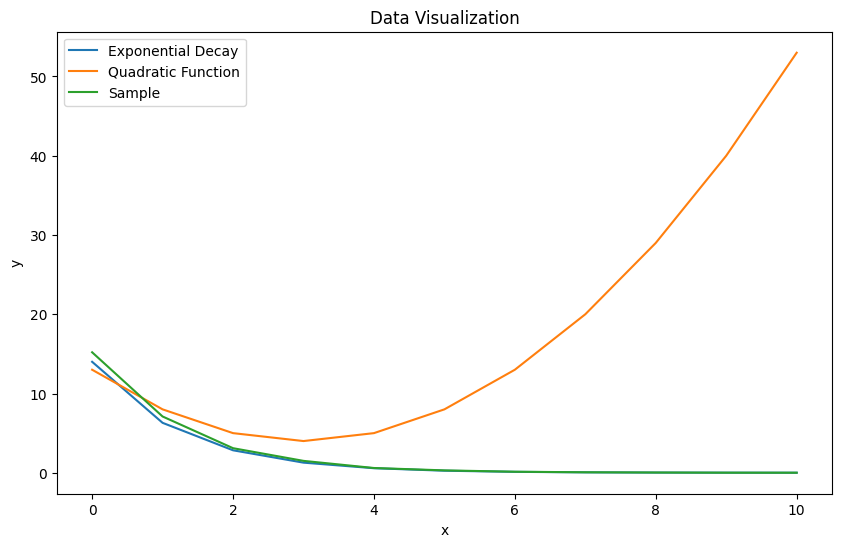

In [23]:
exec(step_5_response)

In [24]:
system_prompt = f"""You are an expert mathematician and data scientist.
I have 2 functions:
{text}
- Given the provided dataset, which function more closely matches the dataset?
- Please format your response as just the single character a or b
- Do not include any comments in your response.
- Do not include the dataset in your response. Only include the answer a or b. 
"""

In [25]:
step_6_response = gpt.chat_create(system_prompt, json.dumps(dataset_2['Sample']), model, output_json=False)

In [26]:
step_6_response

'a'